In [3]:
%matplotlib inline
import pandas as pd

titles = pd.read_csv('titles.csv')
titles.head()
cast = pd.read_csv('cast.csv')
cast.head()
movies = pd.read_csv('movies.csv')
movies.head()

# Assuming you have a DataFrame 'titles' with a 'year' column

# Extract the decade information from the 'year' column


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


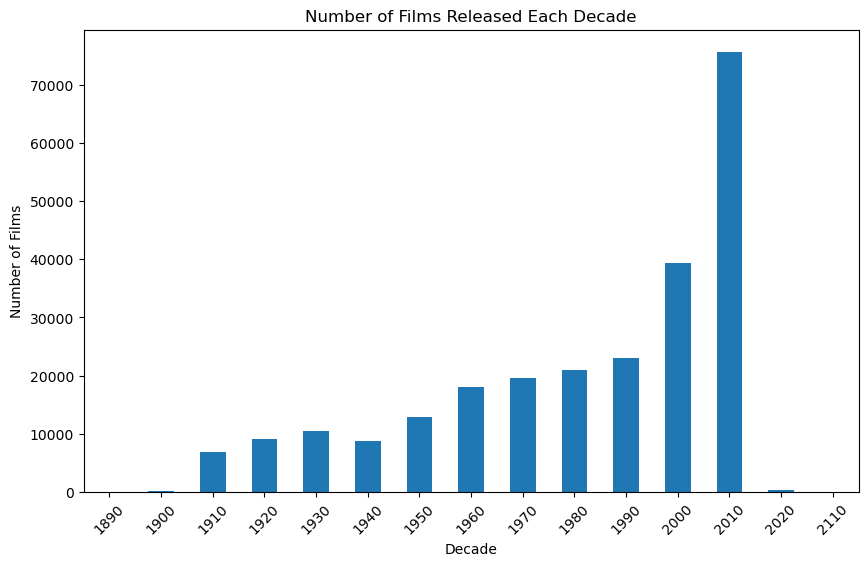

In [4]:
titles['decade'] = (titles['year'] // 10) * 10
films_per_decade = titles.groupby('decade')['title'].count()

films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Released Each Decade')
plt.xticks(rotation=45)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19948\273677625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10


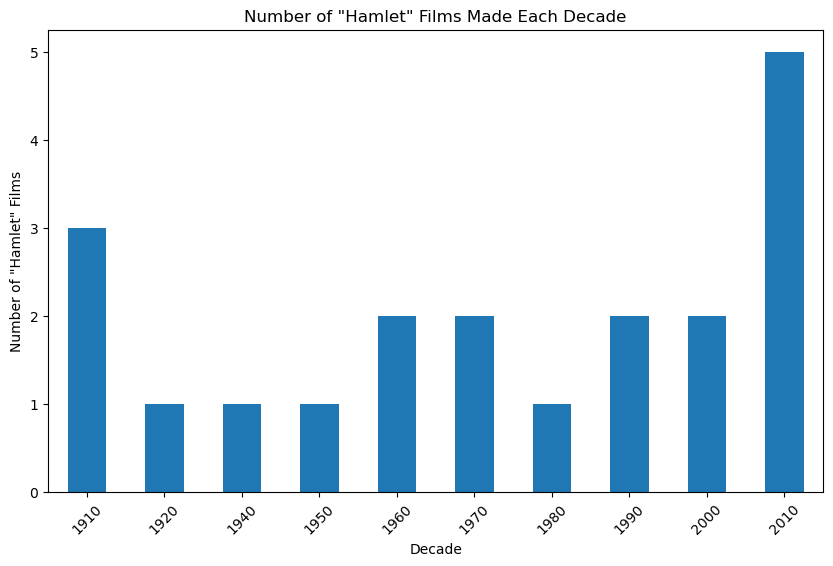

In [5]:
hamlet_movies = titles[titles['title'] == 'Hamlet']

hamlet_movies['decade'] = (hamlet_movies['year'] // 10) * 10
hamlet_films_per_decade = hamlet_movies.groupby('decade')['title'].count()

hamlet_films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xticks(rotation=45)
plt.show()

In [6]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

leading_roles = roles_1950s[roles_1950s['n'] == 1]
leading_roles_count = leading_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

print(leading_roles_count)

type  actor  actress
year                
1950    625      288
1951    651      285
1952    613      304
1953    664      312
1954    636      316
1955    648      285
1956    668      307
1957    739      315
1958    715      301
1959    733      327


In [7]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

roles_count = roles_1950s.groupby(['type', 'n'])['n'].count().unstack(fill_value=0)
print(roles_count)

n        1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0   \
type                                                                            
actor     6692   4640   5654   5663   5674   5591   5532   5302   4906   4466   
actress   3040   4635   3201   2881   2592   2384   2069   1853   1680   1523   

n        ...  157.0  158.0  159.0  160.0  161.0  162.0  163.0  164.0  418.0  \
type     ...                                                                  
actor    ...      0      0      0      0      0      0      0      0      0   
actress  ...      1      1      1      1      1      1      1      1      1   

n        788.0  
type            
actor        0  
actress      1  

[2 rows x 166 columns]


In [8]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False, regex=False)]

roles_per_movie = pink_panther_movies.groupby('title')['n'].count()
print(roles_per_movie)

title
Curse of the Pink Panther         63
Revenge of the Pink Panther       57
Son of the Pink Panther           43
The Pink Panther                  66
The Pink Panther 2                36
The Pink Panther Strikes Again    61
The Return of the Pink Panther    27
Trail of the Pink Panther         32
Name: n, dtype: int64


In [9]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

roles_per_movie = frank_oz_roles.groupby(['title', 'year'])['name'].count()
multiple_roles_movies = roles_per_movie[roles_per_movie > 1]

result = multiple_roles_movies.reset_index().sort_values('year')
print(result)

                                  title  year  name
8                      The Muppet Movie  1979     8
0        An American Werewolf in London  1981     2
6                The Great Muppet Caper  1981     6
5                      The Dark Crystal  1982     2
9            The Muppets Take Manhattan  1984     7
1                      Follow That Bird  1985     3
7            The Muppet Christmas Carol  1992     7
2                Muppet Treasure Island  1996     4
3                    Muppets from Space  1999     4
4  The Adventures of Elmo in Grouchland  1999     3


In [10]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

character_counts = frank_oz_roles.groupby('character').size()
characters_at_least_twice = character_counts[character_counts >= 2]

print(characters_at_least_twice.index.tolist())

['Animal', 'Bert', 'Cookie Monster', 'Fozzie Bear', 'Grover', 'Miss Piggy', 'Sam the Eagle', 'Yoda']
